# Simple Linier Regression


## Contoh Penerapan: Hubungan Diameter Pizza dengan Harga Pizza


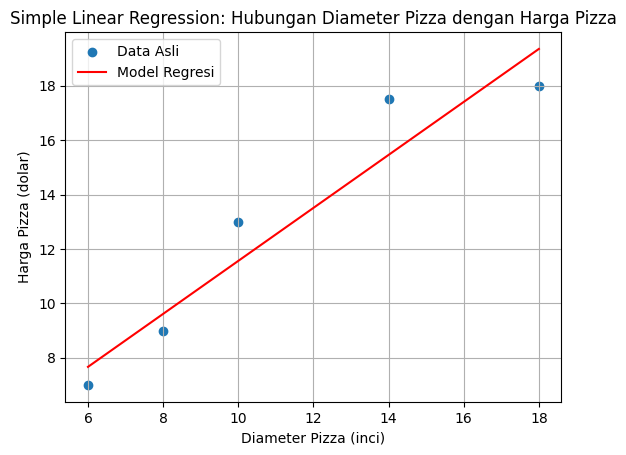

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Data
diameter_pizza = np.array([6, 8, 10, 14, 18])
harga_pizza = np.array([7, 9, 13, 17.5, 18])

# Estimasi parameter
beta_0 = 1.82
beta_1 = 0.974

# Model regresi
harga_prediksi = beta_0 + beta_1 * diameter_pizza

# Membuat plot
plt.scatter(diameter_pizza, harga_pizza, label='Data Asli')
plt.plot(diameter_pizza, harga_prediksi, color='red', label='Model Regresi')
plt.xlabel('Diameter Pizza (inci)')
plt.ylabel('Harga Pizza (dolar)')
plt.title('Simple Linear Regression: Hubungan Diameter Pizza dengan Harga Pizza')
plt.legend()
plt.grid(True)
plt.show()


## Evaluasi Model dengan Cost Function

In [2]:
import numpy as np

# Data
harga_pizza_asli = np.array([7, 9, 13, 17.5, 18])
harga_pizza_prediksi = np.array([1.82 + 0.974 * 6, 1.82 + 0.974 * 8, 1.82 + 0.974 * 10, 1.82 + 0.974 * 14, 1.82 + 0.974 * 18])

# Menghitung RSS
RSS = np.sum((harga_pizza_asli - harga_pizza_prediksi) ** 2)
print("RSS:", RSS)

RSS: 8.89488


## Evaluasi Model Dengan R-squared (R2)


In [3]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Data
harga_pizza_asli = np.array([7, 9, 13, 17.5, 18])
diameter_pizza = np.array([6, 8, 10, 14, 18])

# Estimasi parameter
beta_0 = 1.82
beta_1 = 0.974

# Prediksi harga pizza
harga_pizza_prediksi = beta_0 + beta_1 * diameter_pizza

# Menghitung RSS (Residual Sum of Squares)
RSS = np.sum((harga_pizza_asli - harga_pizza_prediksi) ** 2)

# Menghitung TSS (Total Sum of Squares)
TSS = np.sum((harga_pizza_asli - np.mean(harga_pizza_asli)) ** 2)

# Menghitung R-squared (R2)
R2 = 1 - (RSS / TSS)

# Menampilkan predicted price in dollar
print("Predicted Price in Dollar:", harga_pizza_prediksi)

# Menghitung MAE (Mean Absolute Error)
mae = mean_absolute_error(harga_pizza_asli, harga_pizza_prediksi)

# Menghitung MSE (Mean Squared Error)
mse = mean_squared_error(harga_pizza_asli, harga_pizza_prediksi)

print("Residual Sum of Squares (RSS)", RSS)
print("Total Sum of Squares (TSS)", TSS)
print("R-squared (R2):", R2)
print("MAE (Mean Absolute Error):", mae)
print("MSE (Mean Squared Error):", mse)

Predicted Price in Dollar: [ 7.664  9.612 11.56  15.456 19.352]
Residual Sum of Squares (RSS) 8.89488
Total Sum of Squares (TSS) 97.19999999999999
R-squared (R2): 0.9084888888888889
MAE (Mean Absolute Error): 1.2224
MSE (Mean Squared Error): 1.7789760000000001


# Multiple Linear Regression


In [4]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Data training
X_train = np.array([
    [6, 2],
    [8, 1],
    [10, 0],
    [14, 2],
    [18, 3]
])
y_train = np.array([7, 9, 13, 17.5, 18])

# Data testing
X_test = np.array([
    [8, 2],
    [9, 0],
    [11, 2],
    [16, 2],
    [12, 0]
])
y_test = np.array([11, 8.5, 15, 18, 11])

# Inisialisasi model Linear Regression
model = LinearRegression()

# Melatih model dengan data training
model.fit(X_train, y_train)

# Melakukan prediksi dengan data testing
y_pred = model.predict(X_test)

# Menghitung R-squared (R2) dari model terlatih
r2 = r2_score(y_test, y_pred)

# Menampilkan hasil prediksi dan nilai target
print("Hasil Prediksi Harga Pizza:")
for i in range(len(y_pred)):
    print(f"Data Test {i + 1}: Prediksi ${y_pred[i]:.2f}, Target ${y_test[i]:.2f}")

# Menampilkan nilai R-squared
print(f"\nR-squared (R2): {r2:.2f}")


Hasil Prediksi Harga Pizza:
Data Test 1: Prediksi $9.00, Target $11.00
Data Test 2: Prediksi $11.97, Target $8.50
Data Test 3: Prediksi $12.31, Target $15.00
Data Test 4: Prediksi $17.81, Target $18.00
Data Test 5: Prediksi $15.27, Target $11.00

R-squared (R2): 0.27


# Regresi Polynomial


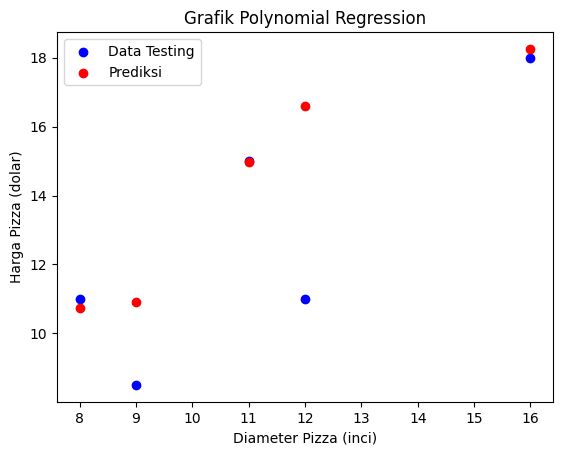

R-squared (R2): 0.34


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Data training
X_train = np.array([
    [6, 2],
    [8, 1],
    [10, 0],
    [14, 2],
    [18, 3]
])
y_train = np.array([7, 9, 13, 17.5, 18])

# Data testing
X_test = np.array([
    [8, 2],
    [9, 0],
    [11, 2],
    [16, 2],
    [12, 0]
])
y_test = np.array([11, 8.5, 15, 18, 11])

# Inisialisasi model Linear Regression
model = LinearRegression()

# Membentuk polinomial fitur
poly = PolynomialFeatures(degree=2)  # Ganti degree sesuai dengan derajat polinomial yang diinginkan
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Melatih model dengan data training
model.fit(X_train_poly, y_train)

# Melakukan prediksi dengan data testing
y_pred = model.predict(X_test_poly)

# Menghitung R-squared (R2) dari model terlatih
r2 = r2_score(y_test, y_pred)

# Plot hasil regresi
plt.scatter(X_test[:, 0], y_test, color='blue', label='Data Testing')
plt.scatter(X_test[:, 0], y_pred, color='red', label='Prediksi')
plt.title('Grafik Polynomial Regression')
plt.xlabel('Diameter Pizza (inci)')
plt.ylabel('Harga Pizza (dolar)')
plt.legend()
plt.show()

# Menampilkan nilai R-squared
print(f"R-squared (R2): {r2:.2f}")
